# **Part Two of the Course Project**
<span style="color:black">In this project, you will identify common topics among 59 presidential inaugural speeches using Latent Dirichlet Allocation (LDA) built on a term frequency-inverse document frequency (TF-IDF) document term matrix (DTM).
<hr style="border-top: 2px solid #606366; background: transparent;">


# **Setup**
Reset the Python environment to clear it of any previously loaded variables, functions, or libraries. Then, load the relevant libraries and speech document file IDs, containing an inauguration year and the president's last name.

In [1]:
%reset -f
from IPython.core.interactiveshell import InteractiveShell as IS
IS.ast_node_interactivity = "all"    # allows multiple outputs from a cell
import numpy as np, pandas as pd, nltk, plotly.express as px, seaborn as sns, matplotlib.pyplot as plt, scipy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from numpy.testing import assert_equal as eq, assert_almost_equal as aeq
import unittest
from colorunittest import run_unittest

_ = nltk.download(['inaugural'], quiet=True)
FIDs = nltk.corpus.inaugural.fileids()[:59]  # load file IDs (incl. 2021-Biden). This list grows over years
print(FIDs[-5:])   # a few most recent presidential speech file names

['2005-Bush.txt', '2009-Obama.txt', '2013-Obama.txt', '2017-Trump.txt', '2021-Biden.txt']


Next, load all speeches into `LsDocs` as a list of string documents. Below you will find a few recent speech excerpts.

In [2]:
LsDocs = [nltk.corpus.inaugural.raw(fid) for fid in FIDs]
[s[:100]+'...' for s in LsDocs[-5:]]

['Vice President Cheney, Mr. Chief Justice, President Carter, President Bush, President Clinton, membe...',
 'My fellow citizens:\n\nI stand here today humbled by the task before us, grateful for the trust you ha...',
 'Thank you. Thank you so much.\n\nVice President Biden, Mr. Chief Justice, Members of the United States...',
 'Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow ...',
 'Chief Justice Roberts, Vice President Harris, Speaker Pelosi, Leader Schumer, Leader McConnell, Vice...']

##  Building Topics
 
Next, you will complete the `GetDTM()` function to compute the TF-IDF DTM. Use the following default parameters for the [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) object:
 
<ol>
<span style="color:black"><li>
Specify `ngram_range=(1,3)` to pick 1-gram, 2-gram, and 3-gram word sequences. The inaugural speeches are likely to contain these meaningful combinations. E.g., <code>'Vice President Cheney'</code>, <code>'Vice President'</code>, <code>'Mr. Chief Justice'</code>, <code>'Chief Justice'</code>, <code>'Thank you'</code>, <code>'United States'</code>, <code>'United States America'</code>, and so on. Shorter and longer grams can also be worth exploring, but longer grams will exponentially increase the count of considered keywords (or collocations) for vocabulary. 
    </li>
<span style="color:black"><li>
Specify <code>stopwords='english'</code> to remove English stopwords. </li>
<span style="color:black"><li>
Specify <code>min_df=0.01</code> to drop the least frequent words and collocations. </li>
<span style="color:black"><li>
Specify <code>max_df=0.99</code> to drop any words and collocations that appear across all documents; hence, are also considered to be stop words). </li>

In [3]:
#version to work on

def GetDTM(LsDocs=[''], ngram_range=(1,3), stop_words='english', min_df=0.01, max_df=0.99) -> scipy.sparse.csr_matrix:
    tv = TfidfVectorizer(ngram_range=ngram_range, 
                         stop_words=stop_words, 
                         min_df=min_df, 
                         max_df=max_df)
    smDTM = tv.fit_transform(LsDocs)
    
    return smDTM, tv

smDTM, tv = GetDTM(LsDocs)  # build a TF-IDF DTM in sparse matrix format

In [ ]:
def GetDTM(LsDocs=[''], ngram_range=(1,3), stop_words='english', min_df=0.01, max_df=0.99) -> scipy.sparse.csr_matrix:
    '''Builds TF-IDF document term matrix (DTM) for LsDocs list of string documents.
    It builds TfidfVectorizer() object with the input parameters and calls fit_transform() method on LsDocs.
    Inputs:
        LsDocs: list of string documents used to build vocabulary and resulting DTM
        See TfidfVectorizer documentation for other parameters.            
    Returns:
        smDTM: TF-IDF document term matrix in sparse matrix format with n document rows and m word columns
        tv: instantiated TfidfVectorizer object (which contains .vocabulary property)
    '''
    # YOUR CODE HERE
    raise NotImplementedError()
    return smDTM, tv

smDTM, tv = GetDTM(LsDocs)  # build a TF-IDF DTM in sparse matrix format

The following tests will verify the correctness of your function implementation and help you troubleshoot your code.

In [4]:
@run_unittest
class test_GetDTM(unittest.TestCase):
    def test_00(self): eq(type(smDTM), scipy.sparse.csr.csr_matrix)
    def test_01(self): eq(smDTM.shape, (59, 119141))  # verify shape of sparse matrix. It should have 59 rows (one for each speech document)
    def test_02(self): eq(smDTM.nnz, 152443)          # verify count of non zero values
    def test_03(self): aeq(smDTM.min(), 0)            # verify min value in DTM
    def test_04(self): aeq(smDTM.max(), 0.17925725764535508)  # verify max value in DTM
    def test_05(self): aeq(smDTM.sum(), 2769.289958141047)    # verify sum of all values
    def test_06(self): eq(type(tv.vocabulary_), dict)         # verify dictionary type of vocabulary
    def test_07(self): eq(len(tv.vocabulary_), 119141)        # verify total count of words in a dictionary
    def test_08(self): eq(np.mean(list(tv.vocabulary_.values())), 59570.0)  # verify average count per word in a dictionary
    def test_09(self): eq(sorted(tv.vocabulary_.keys())[-3:], ['zone', 'zone extending', 'zone extending degrees']) # a few words in a dictionary      

Ran 10 tests in 0.148s

OK
test_00 (__main__.test_GetDTM) ... ok
test_01 (__main__.test_GetDTM) ... ok
test_02 (__main__.test_GetDTM) ... ok
test_03 (__main__.test_GetDTM) ... ok
test_04 (__main__.test_GetDTM) ... ok
test_05 (__main__.test_GetDTM) ... ok
test_06 (__main__.test_GetDTM) ... ok
test_07 (__main__.test_GetDTM) ... ok
test_08 (__main__.test_GetDTM) ... ok
test_09 (__main__.test_GetDTM) ... ok

----------------------------------------------------------------------



In [ ]:
# TEST & AUTOGRADE CELL

<span style="color:black">Next, complete the `GetLDA()` function, which consumes the sparse `smDTM` matrix, uses the [`LatentDirichletAllocation`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html) object, and returns a dense LDA matrix wrapped as a Pandas DataFrame. Use the default parameters specified in the interface of `GetLDA()` when instantiating the LDA object.

In [9]:
#working version

def GetLDA(smDTM, nTopics=10, random_state=0) -> pd.DataFrame:
    lda = LatentDirichletAllocation(n_components=nTopics, random_state=random_state)
    topic_matrix = lda.fit_transform(smDTM)
    columns = []
    for i in range(nTopics):
        columns.append(f"Topic_{i+1}")

    dfLDA = pd.DataFrame(topic_matrix, columns=columns)

    return lda, dfLDA

lda, dfLDA = GetLDA(smDTM)  # build LDA matrix wrapped as Pandas dataframe


lda = LatentDirichletAllocation(n_components=nTopics, random_state=random_state)



NameError: name 'nTopics' is not defined

In [6]:
def GetLDA(smDTM, nTopics=10, random_state=0) -> pd.DataFrame:
    '''Builds a dataframe of weights for documents (rows) and topics (columns).
    First create LatentDirichletAllocation() object with the suitable given input parameters. 
    Then call fit_transform() method on the DTM you built earlier. 
    Wrap result as a dataframe before returning.
    Inputs:
        smDTM: TF-IDF DTM in sparse matrix format
        nTopics: number of topic components requred by LatentDirichletAllocation
        random_state: random number generator's seed to ensure reproducibility
    Return:
        LDA matrix wrapped as a dataframe.
    '''
    # YOUR CODE HERE
    raise NotImplementedError()
    return lda, dfLDA

lda, dfLDA = GetLDA(smDTM)  # build LDA matrix wrapped as Pandas dataframe

NotImplementedError: 

The following cell verifies your implementation by checking key elements and statistics of the resulting `dfLDA` dataframe. You can also study these tests to troubleshoot any failing tests.

In [10]:
@run_unittest
class test_GetLDA(unittest.TestCase):
    def test_00(self): eq(type(dfLDA), pd.DataFrame)                  # verify dataframe structure
    def test_01(self): eq(dfLDA.shape, (59, 10))                      # verify shape of the object
    def test_02(self): aeq(dfLDA.min().min(), 0.0012051900213249666)  # verify smallest value in dataframe
    def test_03(self): aeq(dfLDA.max().max(), 0.9867392361247341)     # verify largest value in dataframe
    def test_04(self): aeq(dfLDA.sum().sum(), 59.0)                   # sum of all weights  should equal # of documents
    def test_05(self): aeq(dfLDA.iloc[0,:3].values, [0.00248298, 0.00248299, 0.00248301]) # first 3 values in the top row

Ran 6 tests in 0.021s

OK
test_00 (__main__.test_GetLDA) ... ok
test_01 (__main__.test_GetLDA) ... ok
test_02 (__main__.test_GetLDA) ... ok
test_03 (__main__.test_GetLDA) ... ok
test_04 (__main__.test_GetLDA) ... ok
test_05 (__main__.test_GetLDA) ... ok

----------------------------------------------------------------------



In [ ]:
# TEST & AUTOGRADE CELL

## Visualizing Topics

<span style="color:black">The next few cells use your LDA dataframe to build informative visualizations. First, you will need to show topic weights for each presidential speech in a heatmap.

In [11]:
dfLDA['id'] = [s.replace('.txt','') for s in FIDs]
dfLDA['Post'] = [f'[{i}], ' + s[:70] + '...' for i, s in enumerate(LsDocs)]
cm = sns.light_palette("brown", as_cmap=True)
dfLDA.sort_index(ascending=False).style.background_gradient(cmap=cm, axis=1).set_precision(2)

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,id,Post
58,0.00,0.00,0.00,0.00,0.98,0.00,0.00,0.00,0.00,0.00,2021-Biden,"[58], Chief Justice Roberts, Vice President Harris, Speaker Pelosi, Leader S..."
57,0.00,0.00,0.00,0.00,0.16,0.82,0.00,0.00,0.00,0.00,2017-Trump,"[57], Chief Justice Roberts, President Carter, President Clinton, President ..."
56,0.00,0.00,0.00,0.00,0.19,0.79,0.00,0.00,0.00,0.00,2013-Obama,"[56], Thank you. Thank you so much. Vice President Biden, Mr. Chief Justice..."
55,0.00,0.00,0.00,0.00,0.98,0.00,0.00,0.00,0.00,0.00,2009-Obama,"[55], My fellow citizens: I stand here today humbled by the task before us,..."
54,0.00,0.00,0.00,0.00,0.20,0.00,0.00,0.78,0.00,0.00,2005-Bush,"[54], Vice President Cheney, Mr. Chief Justice, President Carter, President ..."
53,0.00,0.79,0.00,0.00,0.19,0.00,0.00,0.00,0.00,0.00,2001-Bush,"[53], President Clinton, distinguished guests and my fellow citizens, the pe..."
52,0.00,0.00,0.00,0.00,0.19,0.80,0.00,0.00,0.00,0.00,1997-Clinton,"[52], My fellow citizens: At this last presidential inauguration of the 20th..."
51,0.00,0.00,0.00,0.00,0.19,0.00,0.00,0.00,0.79,0.00,1993-Clinton,"[51], My fellow citizens, today we celebrate the mystery of American renewal..."
50,0.00,0.00,0.00,0.00,0.19,0.80,0.00,0.00,0.00,0.00,1989-Bush,"[50], Mr. Chief Justice, Mr. President, Vice President Quayle, Senator Mitch..."
49,0.00,0.00,0.00,0.00,0.21,0.00,0.00,0.78,0.00,0.00,1985-Reagan,"[49], Senator Mathias, Chief Justice Burger, Vice President Bush, Speaker O'..."


The bar plot below illustrates that topic 4 is the most common overall as it is contained within 16 speeches.

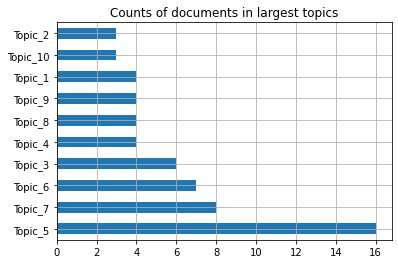

In [12]:
dfLDA.select_dtypes(include=['float64']).T.idxmax().value_counts().plot.barh(grid=True, title='Counts of documents in largest topics');

You will now plot the different topics.

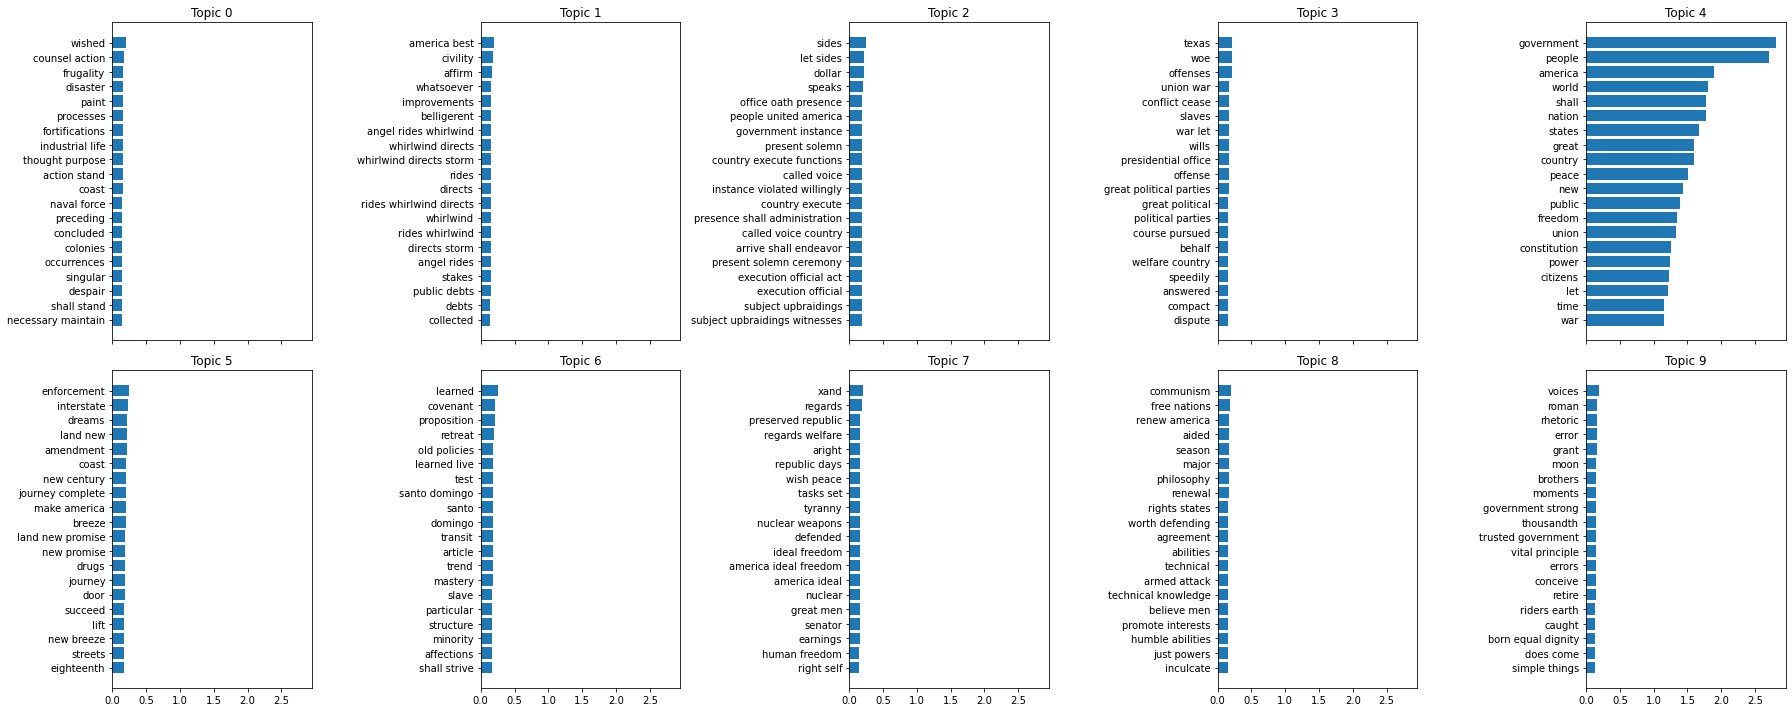

In [13]:
def PlotTopics(model, LsVocab, nTopWords=20, nCols=5):
    import math
    nRows = math.ceil(len(model.components_) / nCols)         # round up
    fig, axes = plt.subplots(nrows=nRows, ncols=nCols, figsize=(25, nTopWords*nRows/4), sharex=True)  # create a row of plot panels
    axes = axes.flatten()                                     # change panel indexing from 2D to 1D
    for nTpcIx, vTpc in enumerate(model.components_):         # topic index and word weights array
        aTopWordsIx = vTpc.argsort()[:-nTopWords - 1:-1]      # find indices of important words in a topic
        LsTopWords = [LsVocab[i] for i in aTopWordsIx]        # find top words in a topic
        axes[nTpcIx].barh(LsTopWords, vTpc[aTopWordsIx])      # plot horizontal bars
        axes[nTpcIx].set_title(f'Topic {nTpcIx}')             # set title of each panel
        axes[nTpcIx].invert_yaxis()                           # flip y axis
    plt.tight_layout()
    plt.show()

PlotTopics(lda, tv.get_feature_names())

The distribution of top words and keywords among topics suggests that topic 4 relates to praises of the nation and its citizens, while not touching on the topics of world and war. The topic 5 focuses on a bright future and opportunities.

The perplexity and log-likelihood metrics are typically used to automatically tune hyper parameters, such as the number of topics, preprocessing, etc. You could also accomplish this by choosing the parameters that increase log-likelihood, making it less negative, and lower perplexity. In fact, try different hyperparameters to see if you can improve these metrics.

In [14]:
print(f'Log Likelihood:\t{lda.score(smDTM):.1f}')
print(f'Perplexity:\t{lda.perplexity(smDTM):.1f}')

Log Likelihood:	-51745.8
Perplexity:	130332442.2
